## Zyad Hassan Hosney 1806090
## Dina Ibrahim Mahfouz Elkady 18q3800



In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn import svm
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
names = ['index',
         'location','country','gender',
        'age','vis_wuhan','from_wuhan',
        'symptom1','symptom2','symptom3',
        'symptom4', 'symptom5', 'symptom6', 'diff_sym_hos','result']
df=pd.read_csv("data.csv",index_col=0,skiprows=1,names=names)

In [3]:
Y=df.result.values
X=df[ ['gender',
        'age',
        'symptom1','symptom2','symptom3',
        'symptom4', 'symptom5', 'symptom6', 'diff_sym_hos']]


In [4]:
xTrain, xTest, yTrain, yTest=train_test_split(X,Y,test_size=0.2,random_state=42, shuffle=True)


# KNN 

In [5]:
#Optimal KNN by Score of Test Data 
acc=[]
for i in range(1,27):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xTrain,yTrain)
    y_pred_knn = knn.predict(xTest)
    acc.append(metrics.accuracy_score(yTest,y_pred_knn))
print(max(acc)," at knn ",(acc.index(max(acc))+1))

0.9421965317919075  at knn  2


In [6]:
#KNN Classsifier 
knn_CrossV=KNeighborsClassifier(n_neighbors=4)
#Cross Validation 
knn_CrossV=cross_validate(knn_CrossV, xTrain, yTrain, cv=5,return_estimator=True,scoring='recall')
print(knn_CrossV['test_score'])
print('CrossV_scores mean:{}'.format(np.mean(knn_CrossV['test_score'])))


[0.5625     0.25       0.64705882 0.52941176 0.58823529]
CrossV_scores mean:0.5154411764705882


In [7]:
knn_opt_cv=knn_CrossV['estimator'][2]

In [8]:
#Hyperituning Model
from sklearn.model_selection import GridSearchCV
grid_knn = {'n_neighbors': np.arange(1, 27)}
knn_Optimal = GridSearchCV(knn_opt_cv,grid_knn,cv=5,scoring='recall')
knn_Optimal.fit(xTrain, yTrain)
print(knn_Optimal.best_params_)
print("Best Score : ",knn_Optimal.best_score_)

{'n_neighbors': 7}
Best Score :  0.6838235294117647


In [9]:
#Predict Test Data
y_KNN_pred=knn_Optimal.predict(xTest)
predict_p_knn = knn_Optimal.predict_proba(xTest)

acc :  0.9190751445086706
Confusion Metrics :  [[143   5]
 [  9  16]]
F1 Score :  0.6956521739130435
precision score :  0.7619047619047619
Recall score :  0.64


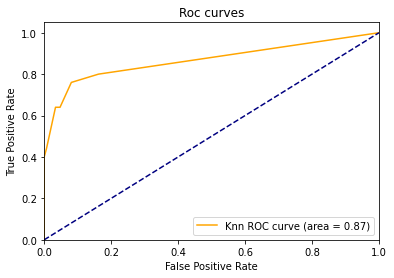

In [10]:
#Metrics 
knn_confusion_metrics = confusion_matrix(yTest,y_KNN_pred)
knn_f1_score=f1_score(yTest,y_KNN_pred)
knn_acc=metrics.accuracy_score(yTest,y_KNN_pred)
knn_precision_score=precision_score(yTest,y_KNN_pred)
knn_recall_score=recall_score(yTest,y_KNN_pred)

print("acc : ",knn_acc)
print("Confusion Metrics : ",knn_confusion_metrics)
print("F1 Score : ",knn_f1_score)
print("precision score : ",knn_precision_score)
print("Recall score : ",knn_recall_score)

fpr_knn, tpr_knn, thresholds_knn= metrics.roc_curve(yTest, predict_p_knn[:,1])
#fpr_knn, tpr_knn, thresholds_knn= metrics.roc_curve(yTest, y_KNN_pred)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.plot(
    fpr_knn,
    tpr_knn,
    color="orange",
    label="Knn ROC curve (area = %0.2f)" % roc_auc_knn,
)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Roc curves")
plt.legend(loc="lower right")
plt.show()

# Naive


In [11]:
#Training Data and Predict without Cross Validation
naive = GaussianNB()
naive.fit(xTrain,yTrain)
y_pred_naive=naive.predict(xTest)
naive_confusion_metrics = confusion_matrix(yTest,y_pred_naive)
naive_f1_score=f1_score(yTest,y_pred_naive)
print("acc : ",metrics.accuracy_score(yTest,y_pred_naive))
print("Confusion Metrics : ",naive_confusion_metrics)
print("F1 Score : ",naive_f1_score)

acc :  0.5202312138728323
Confusion Metrics :  [[68 80]
 [ 3 22]]
F1 Score :  0.3464566929133858


In [12]:
#Cross Validation
naive_CrossV = GaussianNB()
naive_CrossV=cross_validate(naive_CrossV, xTrain, yTrain, cv=5,return_estimator=True,scoring='recall')
print(naive_CrossV['test_score'])
print('CrossV_scores mean:{}'.format(np.mean(naive_CrossV['test_score'])))


[0.9375     0.9375     0.94117647 1.         1.        ]
CrossV_scores mean:0.9632352941176471


In [13]:
naive_opt_cv=naive_CrossV['estimator'][4]

In [14]:
#Hyperituning Model
grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
naive_Optimal = GridSearchCV(naive_opt_cv,grid_nb, cv=5,scoring='recall')
naive_Optimal.fit(xTrain, yTrain)
print(naive_Optimal.best_params_)
print("Best Score : ",naive_Optimal.best_score_)


{'var_smoothing': 3.5111917342151273e-09}
Best Score :  0.9632352941176471


In [15]:
#Predict data 
y_NAIVE_pred=naive_Optimal.predict(xTest)
predict_p_NAIVE = naive_Optimal.predict_proba(xTest)

acc :  0.5317919075144508
Confusion Metrics :  [[71 77]
 [ 4 21]]
F1 Score :  0.3414634146341463
precision score :  0.21428571428571427
Recall score :  0.84


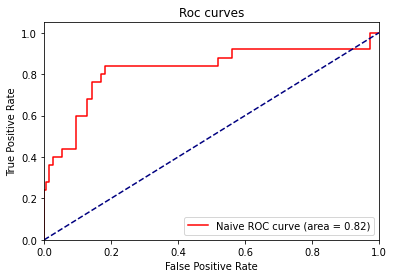

In [16]:
#Metrics 
naive_confusion_metrics = confusion_matrix(yTest,y_NAIVE_pred)
naive_f1_score=f1_score(yTest,y_NAIVE_pred)
naive_acc=metrics.accuracy_score(yTest,y_NAIVE_pred)
naive_precision_score=precision_score(yTest,y_NAIVE_pred)
naive_recall_score=recall_score(yTest,y_NAIVE_pred)

print("acc : ",naive_acc)
print("Confusion Metrics : ",naive_confusion_metrics)
print("F1 Score : ",naive_f1_score)
print("precision score : ",naive_precision_score)
print("Recall score : ",naive_recall_score)

fpr_np, tpr_np, thresholds_np= metrics.roc_curve(yTest, predict_p_NAIVE[:,1])
roc_auc_np = auc(fpr_np, tpr_np)
plt.plot(
    fpr_np,
    tpr_np,
    color="red",
    label="Naive ROC curve (area = %0.2f)" % roc_auc_np,
)

plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Roc curves")
plt.legend(loc="lower right")
plt.show()

# Logistic Regression 


In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
#Training Data and Predict without Cross Validation
logistic = LogisticRegression(random_state=0,solver='lbfgs', max_iter=1000)
logistic.fit(xTrain,yTrain)
y_pred_log=logistic.predict(xTest)
logistic_confusion_metrics = confusion_matrix(yTest,y_pred_log)
logistic_f1_score=f1_score(yTest,y_pred_log)
print("acc : ",metrics.accuracy_score(yTest,y_pred_log))
print("Confusion Metrics : ",logistic_confusion_metrics)
print("F1 Score : ",logistic_f1_score)

acc :  0.930635838150289
Confusion Metrics :  [[145   3]
 [  9  16]]
F1 Score :  0.7272727272727272


In [19]:
#Cross Validation
logistic_CrossV = LogisticRegression(random_state=0,solver='lbfgs', max_iter=1000000)
logistic_CrossV=cross_validate(logistic_CrossV, xTrain, yTrain, cv=5,scoring='recall',return_estimator=True)
print(logistic_CrossV['test_score'])
print('CrossV_scores mean:{}'.format(np.mean(logistic_CrossV['test_score'])))

[0.625      0.4375     0.58823529 0.76470588 0.76470588]
CrossV_scores mean:0.6360294117647058


In [20]:
logistic_opt_cv=logistic_CrossV['estimator'][4]


In [21]:
#Hyprertuning parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [1000,100, 10, 1.0, 0.1, 0.01,0.001]
grid_log = dict(solver=solvers,penalty=penalty,C=c_values)
logistic_opt = GridSearchCV(estimator=logistic_opt_cv, param_grid=grid_log, cv=5,scoring='recall')
logistic_opt.fit(xTrain, yTrain)
print(logistic_opt.best_params_)
print("Best Score : ",logistic_opt.best_score_)


{'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score :  0.6485294117647059


In [22]:
#Predict data 
y_Logistic_pred=logistic_opt.predict(xTest)
predict_p_Logistic = logistic_opt.predict_proba(xTest)

acc :  0.930635838150289
Confusion Metrics :  [[145   3]
 [  9  16]]
F1 Score :  0.7272727272727272
precision score :  0.8421052631578947
Recall score :  0.64


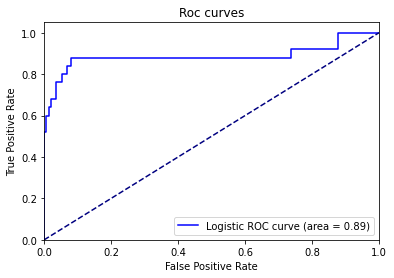

In [23]:
#Metrics 
logistic_confusion_metrics = confusion_matrix(yTest,y_Logistic_pred)
logistic_f1_score=f1_score(yTest,y_Logistic_pred)
logistic_acc=metrics.accuracy_score(yTest,y_Logistic_pred)
logistic_precision_score=precision_score(yTest,y_Logistic_pred)
logistic_recall_score=recall_score(yTest,y_Logistic_pred)
print("acc : ",logistic_acc)
print("Confusion Metrics : ",logistic_confusion_metrics)
print("F1 Score : ",logistic_f1_score)
print("precision score : ",logistic_precision_score)
print("Recall score : ",logistic_recall_score)
fpr_log, tpr_log, thresholds_log= metrics.roc_curve(yTest, predict_p_Logistic[:,1])
roc_auc_log = auc(fpr_log, tpr_log)
plt.plot(
    fpr_log,
    tpr_log,
    color="blue",
    label="Logistic ROC curve (area = %0.2f)" % roc_auc_log,
)

plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Roc curves")
plt.legend(loc="lower right")
plt.show()

# Support Vector Machines

In [24]:
#Training Data and Predict without Cross Validation
S_V_M = svm.SVC(probability = True)
S_V_M.fit(xTrain,yTrain)
y_pred_svm=S_V_M.predict(xTest)
svm_confusion_metrics = confusion_matrix(yTest,y_pred_svm)
svm_f1_score=f1_score(yTest,y_pred_svm)
print("acc : ",metrics.accuracy_score(yTest,y_pred_svm))
print("Confusion Metrics : ",svm_confusion_metrics)
print("F1 Score : ",svm_f1_score)

acc :  0.9190751445086706
Confusion Metrics :  [[145   3]
 [ 11  14]]
F1 Score :  0.6666666666666666


In [25]:
#Cross Validation
svm_CrossV = svm.SVC(probability = True)
svm_CrossV=cross_validate(svm_CrossV, xTrain, yTrain, cv=5,return_estimator=True,scoring='recall')
print(svm_CrossV['test_score'])
print('CrossV_scores mean:{}'.format(np.mean(svm_CrossV['test_score'])))


[0.5        0.3125     0.52941176 0.52941176 0.76470588]
CrossV_scores mean:0.5272058823529411


In [26]:
svm_opt_cv=svm_CrossV['estimator'][4]

In [27]:
#Hyprertuning parameters
grid_svm = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
svm_Optimal = GridSearchCV(svm_opt_cv,grid_svm, cv=5,scoring='recall')
svm_Optimal.fit(xTrain, yTrain)
print(svm_Optimal.best_params_)
print("Best Score : ",svm_Optimal.best_score_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
Best Score :  0.7080882352941176


In [28]:
#Predict data 
y_svm_pred=svm_Optimal.predict(xTest)
predict_p_svm = svm_Optimal.predict_proba(xTest)

acc :  0.9364161849710982
Confusion Metrics :  [[145   3]
 [  8  17]]
F1 Score :  0.7555555555555556
precision score :  0.85
Recall score :  0.68


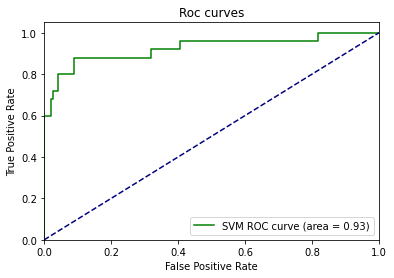

In [29]:
#Metrics 
SVM_confusion_metrics = confusion_matrix(yTest,y_svm_pred)
SVM_f1_score=f1_score(yTest,y_svm_pred)
SVM_acc=metrics.accuracy_score(yTest,y_svm_pred)
SVM_precision_score=precision_score(yTest,y_svm_pred)
SVM_recall_score=recall_score(yTest,y_svm_pred)
print("acc : ",SVM_acc)
print("Confusion Metrics : ",SVM_confusion_metrics)
print("F1 Score : ",SVM_f1_score)
print("precision score : ",SVM_precision_score)
print("Recall score : ",SVM_recall_score)
fpr_svm, tpr_svm, thresholds_svm= metrics.roc_curve(yTest, predict_p_svm[:,1])
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(
    fpr_svm,
    tpr_svm,
    color="green",
    label="SVM ROC curve (area = %0.2f)" % roc_auc_svm,
)

plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Roc curves")
plt.legend(loc="lower right")
plt.show()

# Decision Tree


In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
from sklearn import tree

In [32]:
#Training Data and Predict without Cross Validation
DT = DecisionTreeClassifier()
DT.fit(xTrain,yTrain)
y_pred_DT=DT.predict(xTest)
DT_confusion_metrics = confusion_matrix(yTest,y_pred_DT)
DT_f1_score=f1_score(yTest,y_pred_DT)
print("acc : ",metrics.accuracy_score(yTest,y_pred_DT))
print("Confusion Metrics : ",DT_confusion_metrics)
print("F1 Score : ",DT_f1_score)

acc :  0.9190751445086706
Confusion Metrics :  [[142   6]
 [  8  17]]
F1 Score :  0.7083333333333334


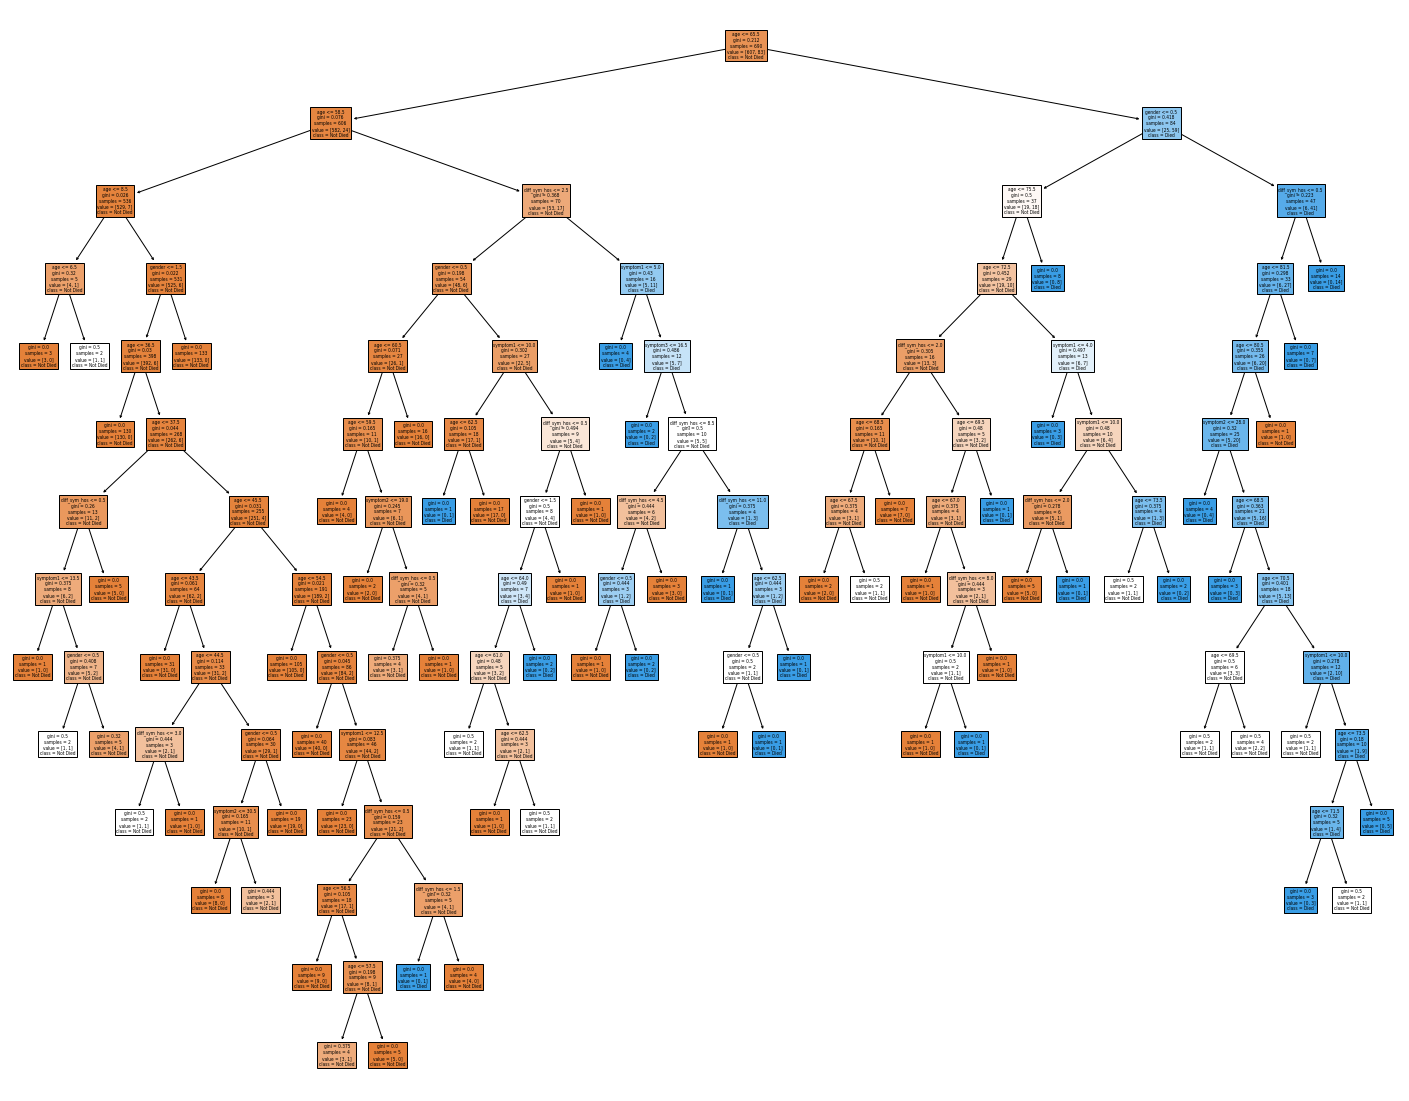

In [33]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DT,
                   feature_names=xTrain.columns,
                   class_names=['Not Died', "Died"],
                   filled=True)

In [34]:
#Hyprertuning parameters
grid_DT = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [2,4,3,5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"],
    'min_samples_split':np.arange(2,50)}
DT_Optimal = GridSearchCV(DT,grid_DT, cv=5,scoring='recall')
DT_Optimal.fit(xTrain, yTrain)
print(DT_Optimal.best_params_)
print("Best Score : ",DT_Optimal.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Score :  0.7573529411764705


In [35]:
 DT_Optimal.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)

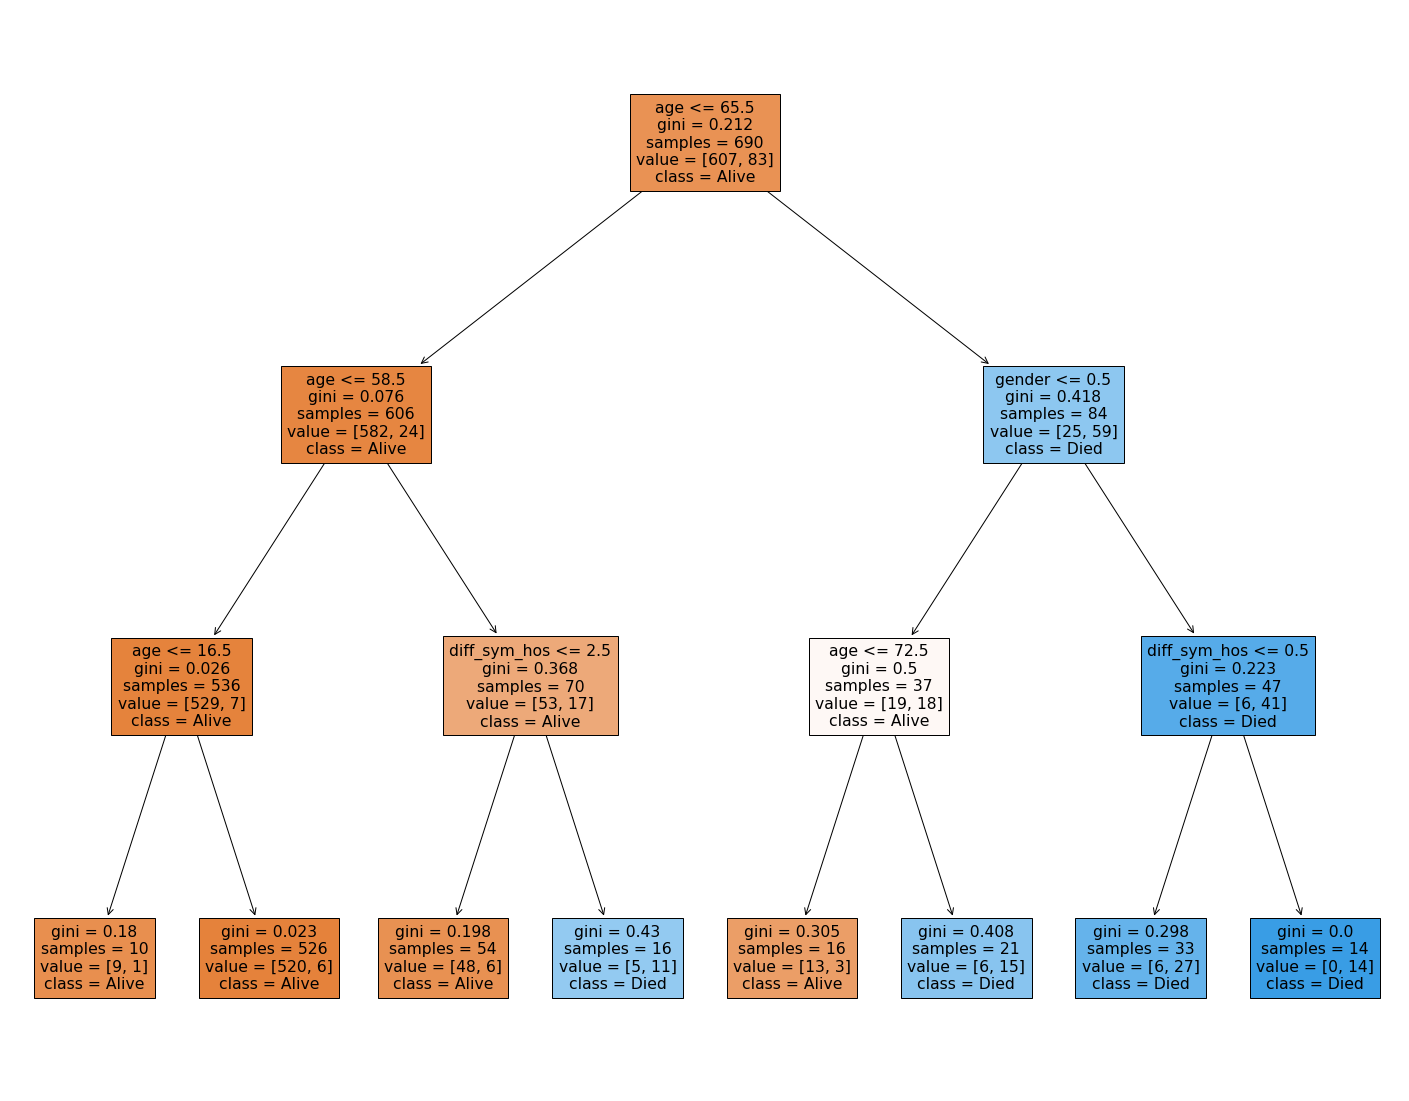

In [45]:
DT_OPT=DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=2)
DT_OPT.fit(xTrain, yTrain)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DT_OPT,
                   feature_names=xTrain.columns,
                   class_names=['Alive', "Died"],
                   filled=True)

In [41]:
#Predict data 
y_DT_pred=DT_OPT.predict(xTest)
predict_p_DT = DT_OPT.predict_proba(xTest)

acc :  0.9190751445086706
Confusion Metrics :  [[141   7]
 [  7  18]]
F1 Score :  0.72
precision score :  0.72
Recall score :  0.72


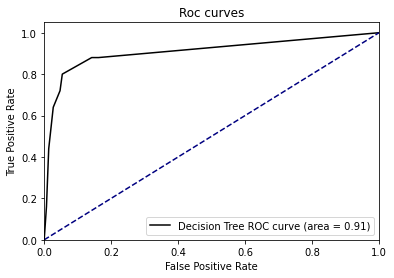

In [42]:
#Metrics 
DT_confusion_metrics = confusion_matrix(yTest,y_DT_pred)
DT_f1_score=f1_score(yTest,y_DT_pred)
DT_acc=metrics.accuracy_score(yTest,y_DT_pred)
DT_precision_score=precision_score(yTest,y_DT_pred)
DT_recall_score=recall_score(yTest,y_DT_pred)
print("acc : ",DT_acc)
print("Confusion Metrics : ",DT_confusion_metrics)
print("F1 Score : ",DT_f1_score)
print("precision score : ",DT_precision_score)
print("Recall score : ",DT_recall_score)
fpr_DT, tpr_DT, thresholds_DT= metrics.roc_curve(yTest, predict_p_DT[:,1])
roc_auc_DT = auc(fpr_DT, tpr_DT)
plt.plot(
    fpr_DT,
    tpr_DT,
    color="black",
    label="Decision Tree ROC curve (area = %0.2f)" % roc_auc_DT,
)

plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Roc curves")
plt.legend(loc="lower right")
plt.show()

# ROC-AUC Curve

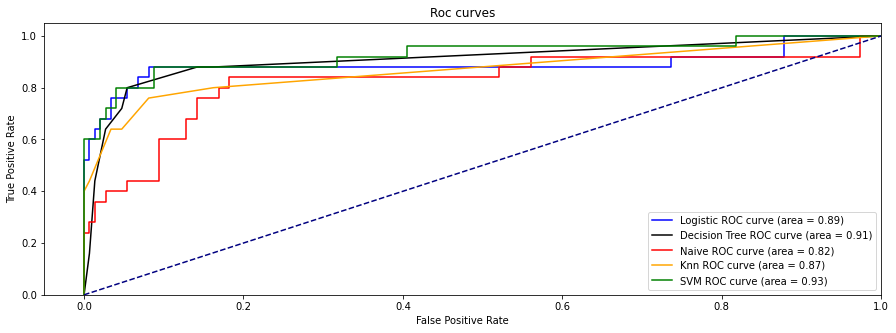

In [53]:

plt.figure(figsize=(15,5))

plt.plot(
    fpr_log,
    tpr_log,
    color="blue",
    label="Logistic ROC curve (area = %0.2f)" % roc_auc_log,
)
plt.plot(
    fpr_DT,
    tpr_DT,
    color="black",
    label="Decision Tree ROC curve (area = %0.2f)" % roc_auc_DT,
)


plt.plot(
    fpr_np,
    tpr_np,
    color="red",
    label="Naive ROC curve (area = %0.2f)" % roc_auc_np,
)

plt.plot(
    fpr_knn,
    tpr_knn,
    color="orange",
    label="Knn ROC curve (area = %0.2f)" % roc_auc_knn,
)
plt.plot(
    fpr_svm,
    tpr_svm,
    color="green",
    label="SVM ROC curve (area = %0.2f)" % roc_auc_svm,
)
plt.plot([0, 1], [0, 1], color="navy",  linestyle="--")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Roc curves")
plt.legend(loc="lower right")
plt.show()